# Data Cleansing

### Reading data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load the data
data_dir = os.getcwd() + '\\data\\'

# reading dataset
df = pd.read_csv(data_dir + '1.csv')

### Basic Statistics


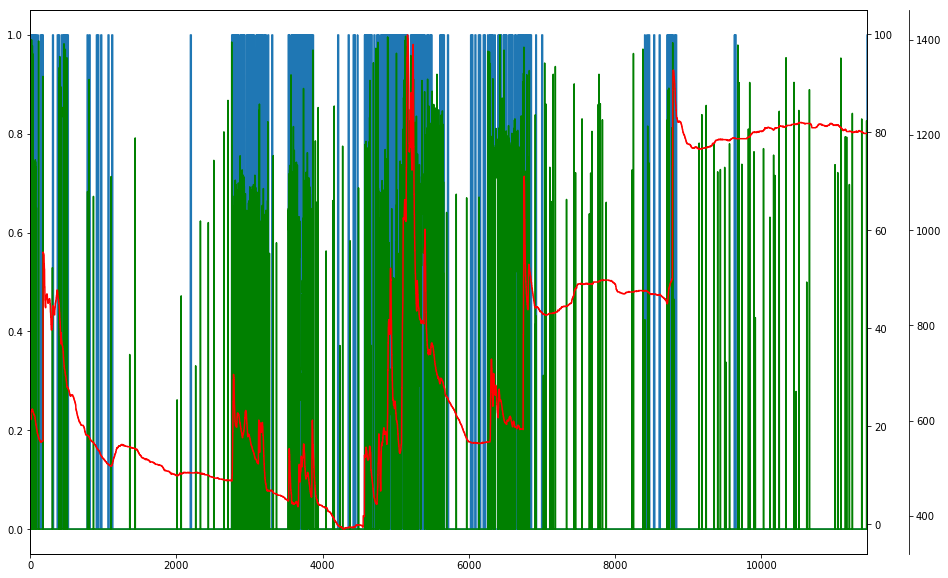

In [2]:
fig, ax = plt.subplots(figsize=(15,10))

ax2, ax3 = ax.twinx(), ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)

df.motion.plot(ax=ax, label = 'Motion')
df.distance.plot(ax=ax2, style='g-', label = 'Distance')
df.co2.plot(ax=ax3, style='r-', label = 'CO2')

plt.show()

In [3]:
df.describe()

,co2,motion,distance
count,11448.000000,11448.000000,11448.000000
mean,770.752096,0.183526,9.713074
std,288.715726,0.387114,24.923468
min,372.000000,0.000000,-1.000000
25%,521.000000,0.000000,-1.000000
50%,672.000000,0.000000,-1.000000
75%,952.500000,0.000000,-1.000000
max,1410.000000,1.000000,99.879311


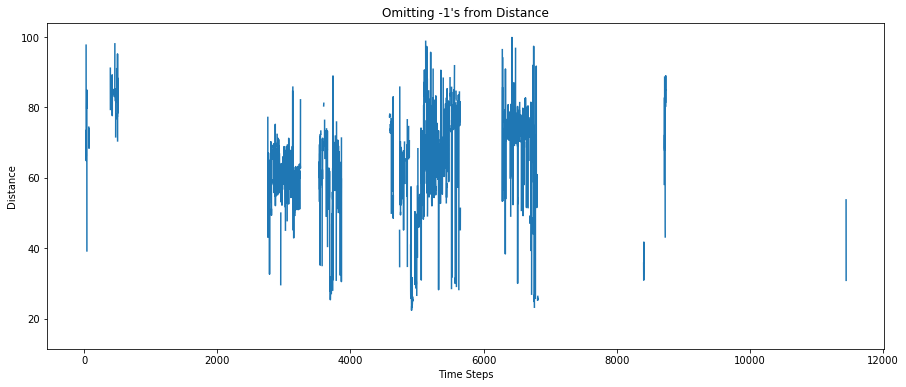

In [4]:
plt.figure(figsize=(15,6))
plt.plot(df.distance.replace(-1,np.NaN))
plt.xlabel('Time Steps')
plt.ylabel('Distance')
plt.title('Omitting -1\'s from Distance')
plt.show()

According to the plot, we can safely replace -1's with 0 or NA

In [5]:
# distance: replacing -1 with 0
df.distance = df.distance.replace(-1, None)

### N-th Discrete Differentiation

We use Min-Max normalization to rescale all plots for better comparison and visualization.

In [6]:
# Min-Max normalization function
def MinMaxNorm(values):
    return (values - values.min()) / (values.max() - values.min())

def MovingAverage(a, n = 3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


#### CO2 Level

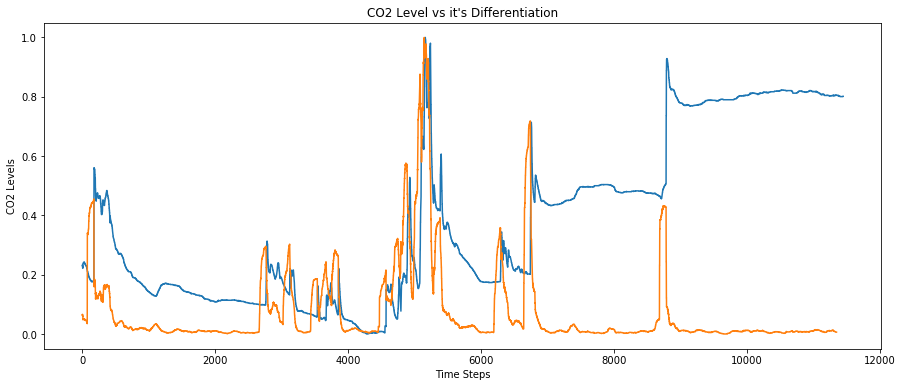

In [7]:
plt.figure(figsize=(15,6))
#plt.plot(MinMaxNorm(abs(np.diff(df.co2)))); 
plt.plot(MinMaxNorm(df.co2));
plt.plot(MinMaxNorm(MovingAverage(abs(np.diff(np.array(df.co2))), 100)));
plt.xlabel('Time Steps')
plt.ylabel('CO2 Levels')
plt.title('CO2 Level vs it\'s Differentiation')
plt.show()

#### Distance

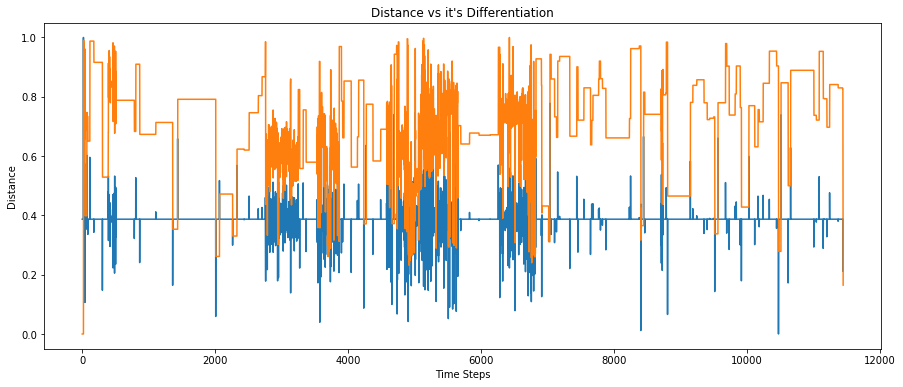

In [8]:
plt.figure(figsize=(15,6))
plt.plot(MinMaxNorm(np.diff(df.distance))); 
plt.plot(MinMaxNorm(df.distance)); 
plt.xlabel('Time Steps')
plt.ylabel('Distance')
plt.title('Distance vs it\'s Differentiation')
plt.show()

### Frequency Domain

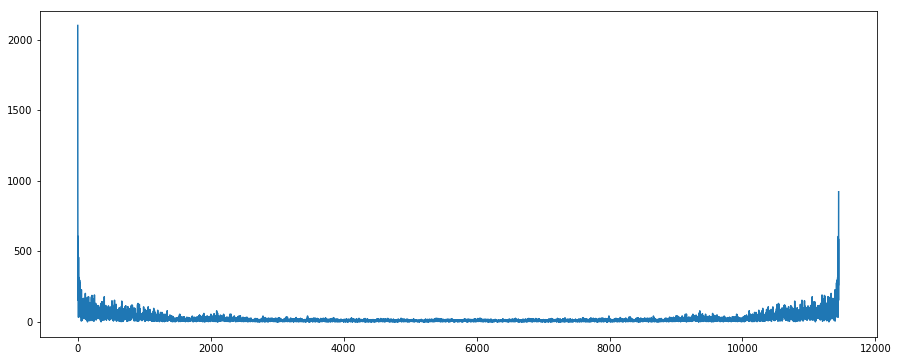

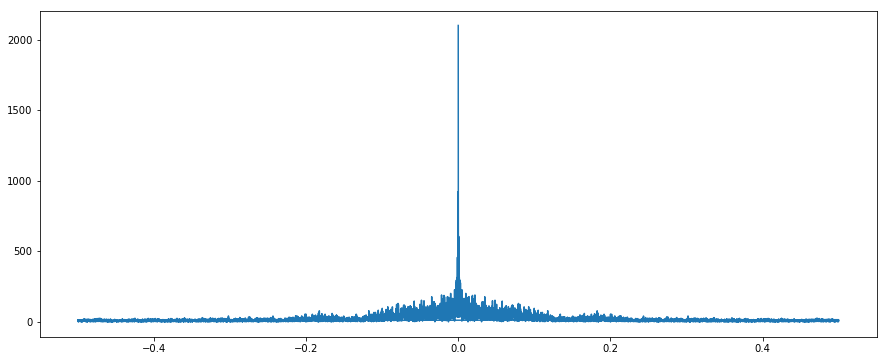

,0
count,11448.000000
mean,-0.000044
std,0.288688
min,-0.500000
25%,-0.250022
50%,-0.000044
75%,0.249934
max,0.499913


In [9]:
plt.figure(figsize=(15,6))
y1t5 = np.absolute(np.fft.fft(df.motion))
ff1t5 = np.fft.fftfreq(len(df.motion))
plt.plot(y1t5); 
plt.show()
plt.figure(figsize=(15,6))
plt.plot(ff1t5, y1t5); 
plt.show()
pd.DataFrame(ff1t5).describe()

### Histograms

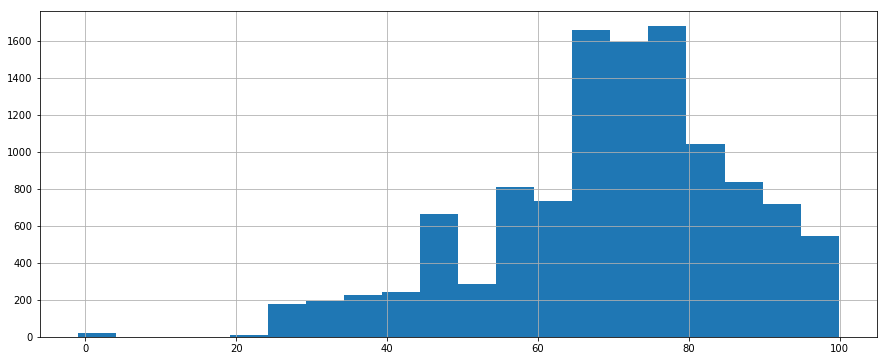

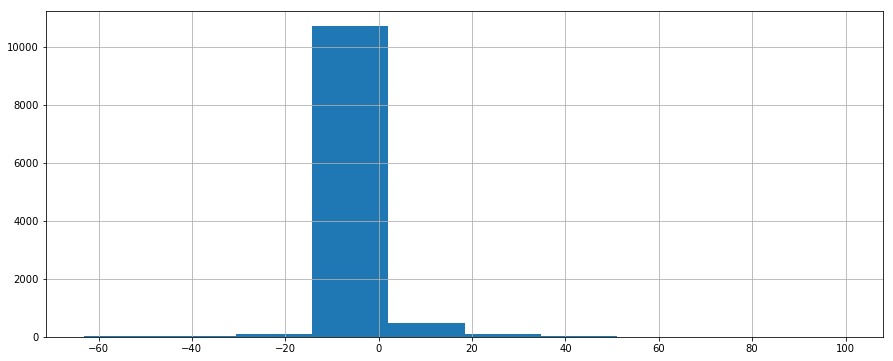

In [10]:
plt.figure(figsize=(15,6))
df.distance.hist(bins=20)
plt.show()
plt.figure(figsize=(15,6))
df.distance.diff().hist(bins = 10)
plt.show()

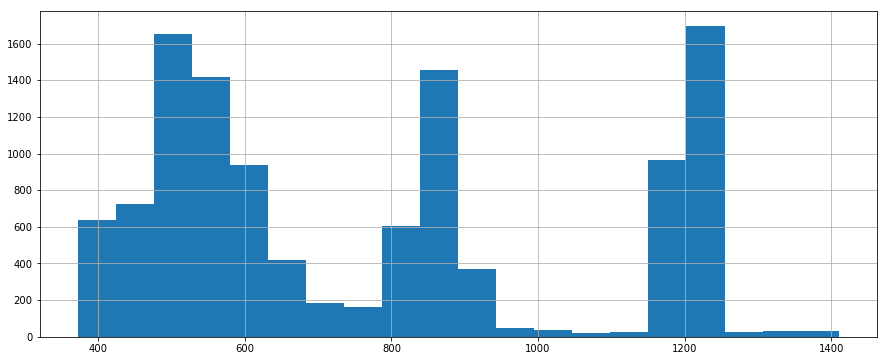

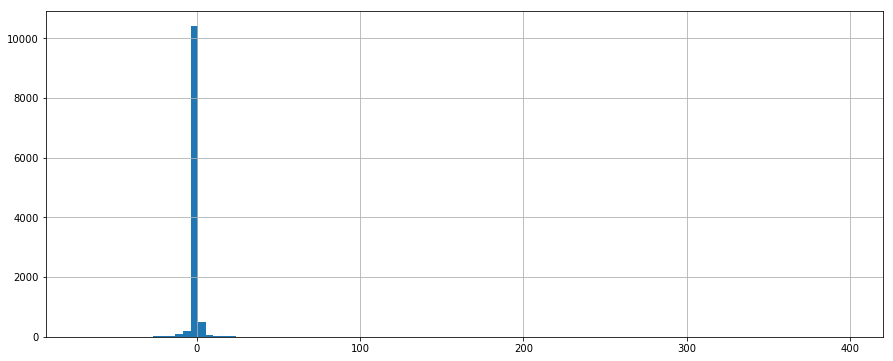

In [11]:
plt.figure(figsize=(15,6))
df.co2.hist(bins=20)
plt.show()
plt.figure(figsize=(15,6))
df.co2.diff().hist(bins = 100)
plt.show()

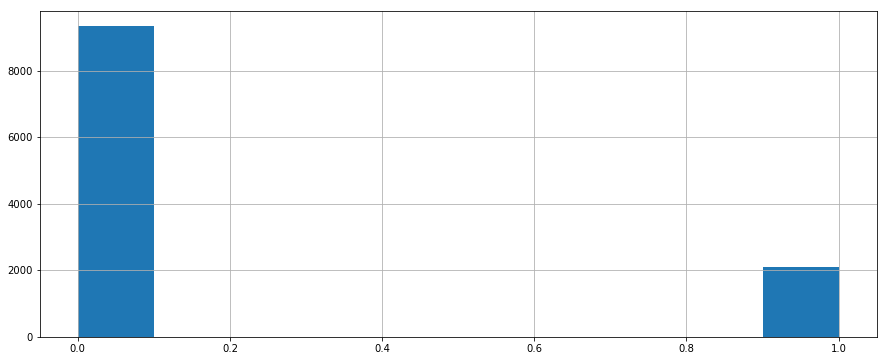

In [12]:
plt.figure(figsize=(15,6))
df.motion.hist()
plt.show()

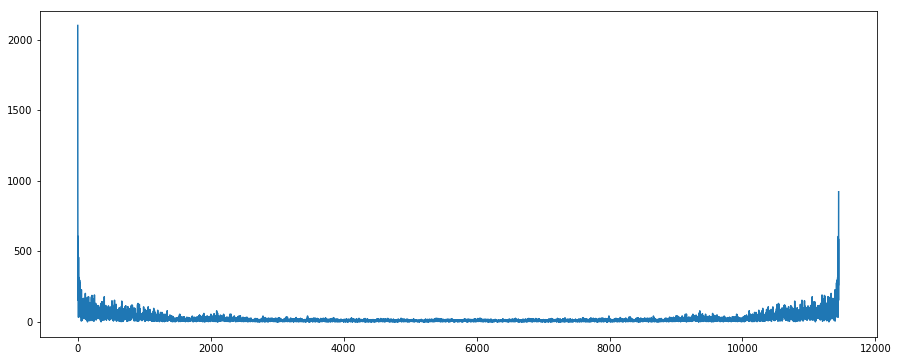

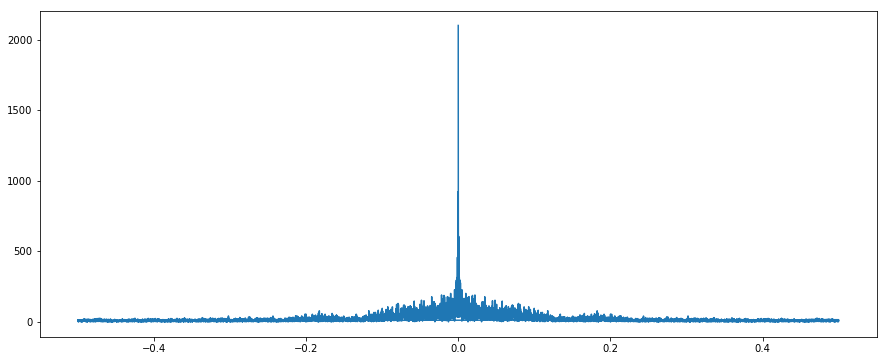

,0
count,11448.000000
mean,-0.000044
std,0.288688
min,-0.500000
25%,-0.250022
50%,-0.000044
75%,0.249934
max,0.499913


In [13]:
plt.figure(figsize=(15,6))
y1t5 = np.absolute(np.fft.fft(df.motion))
ff1t5 = np.fft.fftfreq(11448)
plt.plot(y1t5); 
plt.show()
plt.figure(figsize=(15,6))
plt.plot(ff1t5, y1t5); 
plt.show()
pd.DataFrame(ff1t5).describe()

### Anomaly Detection

In [14]:
# ??????????????????????????????????????????????????????
# Implement later!
# ??????????????????????????????????????????????????????

### Normalization
As we know, our dataset includs different scale measurments. Therefore, we need to normalize our dataset with commonly used methods in range 0 to 1.
For these purpose, we use common **Min-Max** method to normalize for future usage.

*We don't need the motion data to be normalized: it is already binary array.*

In [15]:
# ??????????????????????????????????????????????????????
# More techniques should be implemented later!
# ??????????????????????????????????????????????????????


# Min-Max normalization function
def MinMaxNorm(values):
    return (values - values.min()) / (values.max() - values.min())

# Normalization
df['distance_n'] = MinMaxNorm(df.distance)
df['co2_n'] = MinMaxNorm(df.co2)

### Getting all together
For ease of use, we combine and save the data to be used in the next steps. 

In [16]:
df.to_csv(data_dir + '2.csv', index = False)